<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-02-10 21:28:19
-------------------
qualified stocks: 88
with latest results: 82
still star stocks: 45
-------------------
Initial Investment:  1.07 C
CY Investment:  1.20 C
Reserve:  2.48 L
Current:  1.15 C
-------------------
Today PnL: -1.73 L (-1.48%)
Current PnL: -18.09 L (-15.12%)
CY Booked + Current PnL: -4.22 L (-3.53%)
-------------------
Total profit:  2.20 L
Total loss:  -20.30 L
-------------------
Total Booked + Current PnL: 8.89 L (8.34%)
Total Booked PnL: 26.98 L (25.33%)
Curr Year Booked PnL: 13.87 L (12.01%)
Prev Year Booked PnL: 13.11 L (12.31%)
Est FTT:  1.88 C
Est FTT PnL: 72.46 L (62.74%)
-------------------
Est LTT:  2.48 C
Est LTT PnL: 1.32 C (114.69%)
Deployed:  1.07 C
Current:  1.15 C
CAGR/XIRR %: 6.57%


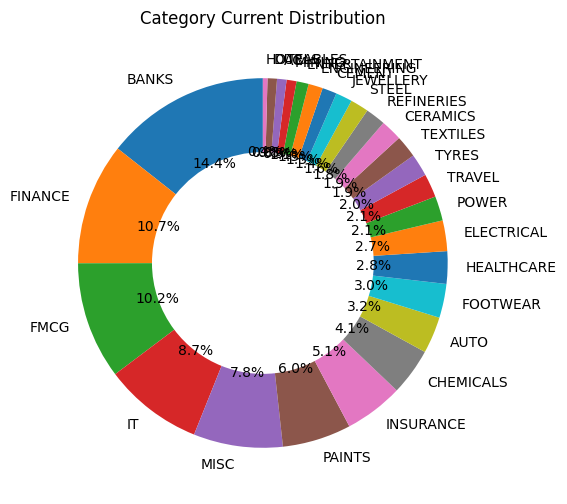

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
53,NMDC,65.62,82.00,-51.94,L-MC,79.55,98104.0,-2295.0,27361.0,-3.81,...,27.89,24.96,507.0,-0.08,0.87,6.87,XY25,NTT,MC,MINING
32,HAVELLS,1588.50,2077.12,1.27,X-LC,71.59,100668.0,592.0,30190.0,-1.00,...,29.99,30.76,NaN,0.02,0.89,20.56,X40,ATH,LC,ELECTRICAL
35,HINDUNILVR,2430.78,2723.00,-14.71,X-LC,53.41,198362.0,-5824.0,30369.0,-0.10,...,15.31,12.02,-3.0,-0.19,1.76,9.50,XY25,NTT,LC,FMCG
11,AXISBANK,986.10,1317.30,-29.20,H-LC,56.82,103198.0,2616.0,31166.0,-1.21,...,30.20,33.59,NaN,0.08,0.91,6.71,X40,ATH,LC,BANKS
72,SIS,477.00,528.00,59.01,M-SC,61.36,57282.0,-23808.0,32479.0,-0.62,...,56.70,10.69,-28.0,-0.73,0.51,10.42,X40N,NTT,SC,MISC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,REPCOHOME,527.76,880.00,-17.15,H-SC,55.68,144002.0,-50741.0,180723.0,-0.65,...,125.50,66.74,-44.0,-0.28,1.27,7.09,XY24,NTT,SC,FINANCE
62,SAIL,130.64,228.00,41.68,M-MC,64.77,181120.0,-43842.0,211494.0,-4.66,...,116.77,74.53,-18.0,-0.21,1.60,5.09,XY24,BTT,MC,STEEL
57,RBLBANK,230.61,388.00,-38.08,M-SC,95.45,170922.0,-63378.0,223293.0,-0.75,...,130.64,68.25,-48.0,-0.28,1.51,12.56,XY24,NTT,SC,BANKS
12,BANDHANBNK,217.54,400.00,-46.85,H-SC,86.36,163354.0,-75287.0,275448.0,-2.27,...,168.62,83.87,-29.0,-0.27,1.45,8.16,XY24,NTT,SC,BANKS


In [5]:
# Xceptional allocation
tmp_df = df_portfolio_features[df_portfolio_features['Conviction'].str.startswith('X-', na=False)]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
32,HAVELLS,1588.50,2077.12,1.27,X-LC,71.59,100668.0,592.0,30190.0,-1.00,...,29.99,30.76,NaN,0.02,0.89,20.56,X40,ATH,LC,ELECTRICAL
35,HINDUNILVR,2430.78,2723.00,-14.71,X-LC,53.41,198362.0,-5824.0,30369.0,-0.10,...,15.31,12.02,-3.0,-0.19,1.76,9.50,XY25,NTT,LC,FMCG
77,TATAELXSI,7332.28,9000.00,-18.33,X-MC,92.05,89284.0,-13368.0,36714.0,-0.92,...,41.12,22.74,-10.0,-0.36,0.79,7.33,X40N,NTT,MC,IT
79,TCS,4164.02,4998.00,-0.55,X-LC,50.00,157441.0,-4956.0,37487.0,0.19,...,23.81,20.03,8.0,-0.13,1.39,12.26,X40,BTT,LC,IT
20,CERA,9059.90,10420.45,-14.81,X-SC,48.86,65910.0,-24689.0,38294.0,-2.87,...,58.10,15.02,-57.0,-0.64,0.58,6.65,X40N,ATH,SC,CERAMICS
39,INFY,1436.24,2275.00,5.19,X-LC,47.73,195551.0,46182.0,41046.0,-1.23,...,20.99,58.40,33.0,1.13,1.73,36.46,X40,BTT,LC,IT
54,PIDILITIND,2482.94,3576.00,-15.68,X-LC,62.50,166347.0,22336.0,41054.0,-0.09,...,24.68,44.02,10.0,0.54,1.47,8.63,X40,BTT,LC,CHEMICALS
59,RELIANCE,1288.53,1526.00,-5.37,X-LC,72.73,198077.0,-5511.0,43022.0,-1.03,...,21.72,18.43,67.0,-0.13,1.75,4.01,XY25,NTT,LC,REFINERIES
46,LTIM,5664.39,7262.39,10.05,X-LC,40.91,173937.0,4005.0,43936.0,-2.66,...,25.26,28.21,7.0,0.09,1.54,27.77,X200,ATH,LC,IT
71,SIEMENS,6028.45,7969.85,-10.44,X-LC,13.64,90937.0,-11547.0,44550.0,-2.84,...,48.99,32.20,NaN,-0.26,0.80,27.07,AR,ATH,LC,ELECTRICAL


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
53,NMDC,65.62,82.0,-51.94,L-MC,79.55,98104.0,-2295.0,27361.0,-3.81,...,27.89,24.96,507.0,-0.08,0.87,6.87,XY25,NTT,MC,MINING
35,HINDUNILVR,2430.78,2723.0,-14.71,X-LC,53.41,198362.0,-5824.0,30369.0,-0.10,...,15.31,12.02,-3.0,-0.19,1.76,9.50,XY25,NTT,LC,FMCG
68,SBIN,760.30,863.0,-19.65,M-LC,63.64,195252.0,-6228.0,33447.0,-0.05,...,17.13,13.51,93.0,-0.19,1.73,5.83,XY25,NTT,LC,BANKS
59,RELIANCE,1288.53,1526.0,-5.37,X-LC,72.73,198077.0,-5511.0,43022.0,-1.03,...,21.72,18.43,67.0,-0.13,1.75,4.01,XY25,NTT,LC,REFINERIES
51,NESTLEIND,2225.87,2755.0,-18.91,X-LC,68.75,202116.0,-438.0,48589.0,-0.18,...,24.04,23.77,NaN,-0.01,1.79,3.97,XY25,NTT,LC,FMCG
23,DABUR,518.36,735.0,-6.14,X-MC,80.68,134666.0,2484.0,52762.0,0.19,...,39.18,41.79,1.0,0.05,1.19,7.65,XY24,BTT,MC,FMCG
49,MEDANTA,1022.60,1486.0,1.48,X-SC,90.91,171965.0,16530.0,53911.0,-3.20,...,31.35,45.32,8.0,0.31,1.52,17.01,XY24,NTT,SC,HEALTHCARE
84,UNIONBANK,123.87,163.0,-14.67,M-MC,98.86,130584.0,-10256.0,54741.0,-2.55,...,41.92,31.59,-39.0,-0.19,1.16,13.43,XY24,NTT,MC,BANKS
4,ADANIPORTS,1103.69,1583.0,-8.40,M-LC,84.09,156755.0,5549.0,60116.0,-0.17,...,38.35,43.43,NaN,0.09,1.39,7.27,XY24,NTT,LC,MISC
15,BERGEPAINT,558.54,680.0,-32.56,H-MC,89.77,153682.0,-23375.0,61872.0,1.14,...,40.26,21.75,-14.0,-0.38,1.36,9.93,XY24,NTT,MC,PAINTS


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
67,SBILIFE,1483.67,1928.65,-10.45,H-LC,60.23,98478.0,-2412.0,32675.0,-1.55,...,33.18,29.99,NaN,-0.07,0.87,8.17,AR,ATH,LC,INSURANCE
38,INDUSINDBK,1354.50,1800.00,-29.02,H-MC,100.00,60876.0,-16330.0,41724.0,-1.03,...,68.54,32.89,-21.0,-0.39,0.54,15.28,XR,NTT,MC,BANKS
48,MASFIN,326.60,399.50,-31.72,H-SC,75.00,75555.0,-22425.0,44298.0,-3.71,...,58.63,22.32,-74.0,-0.51,0.67,5.22,XR,ATH,SC,FINANCE
71,SIEMENS,6028.45,7969.85,-10.44,X-LC,13.64,90937.0,-11547.0,44550.0,-2.84,...,48.99,32.20,NaN,-0.26,0.80,27.07,AR,ATH,LC,ELECTRICAL
81,TRIDENT,37.35,48.00,51.40,M-SC,39.77,73334.0,-18920.0,45225.0,-2.18,...,61.67,28.51,-16.0,-0.42,0.65,2.66,XR,NTT,SC,TEXTILES
19,CAMS,3643.00,5250.99,-3.98,M-SC,2.27,98749.0,-3255.0,48278.0,-3.72,...,48.89,44.14,261.0,-0.07,0.87,30.40,XR,ATH,SC,MISC
45,LAOPALA,369.40,464.00,-30.19,M-SC,9.09,71840.0,-29006.0,54835.0,-3.29,...,76.33,25.61,-50.0,-0.53,0.64,0.46,AR,NTT,SC,CERAMICS
17,BSOFT,628.85,844.81,-8.60,M-SC,44.32,92120.0,-17929.0,55723.0,-1.49,...,60.49,34.34,-28.0,-0.32,0.82,1.72,XR,ATH,SC,IT
24,DEN,52.79,75.00,-31.06,L-SC,31.82,60560.0,-23904.0,59440.0,-0.63,...,98.15,42.07,-21.0,-0.40,0.54,4.30,AR,NTT,SC,ENTERTAINMENT
16,BRITANNIA,4905.19,6446.05,0.33,X-LC,67.05,196386.0,178.0,61449.0,0.80,...,31.29,31.41,239.0,0.00,1.74,6.54,AR,ATH,LC,FMCG


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.38
1,20,35.10
2,30,49.00


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,41.65
X40,14.55
X40N,12.53
AR,10.62
XR,9.87
XY25,7.90
X200,1.54
SR,1.37


In [10]:
# conviction-wise allocation
df_portfolio_features.groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
M-SC,24.02
X-LC,20.97
H-SC,16.53
M-MC,7.90
H-MC,6.20
X-MC,6.07
M-LC,5.44
X-SC,4.63
H-LC,3.26


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features.groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          13.05
X40       X-LC          10.04
XY24      H-SC           7.58
          M-MC           6.26
X40N      H-SC           5.73
XY24      H-MC           5.66
XY25      X-LC           5.30
XR        M-SC           4.42
AR        X-LC           4.09
XY24      M-LC           3.71
X40N      M-SC           3.62
X40       H-LC           2.39
XR        H-SC           2.14
AR        X-MC           1.96
X40N      X-MC           1.78
XY25      M-LC           1.73
X200      X-LC           1.54
XY24      X-SC           1.52
X40N      X-SC           1.40
AR        M-SC           1.26
XY24      X-MC           1.19
X40       X-MC           1.14
AR        H-SC           1.08
XR        X-SC           1.03
XY24      L-SC           0.99
X40       M-SC           0.98
XR        L-SC           0.92
XY25      L-MC           0.87
AR        H-LC           0.87
XR        M-MC           0.82
AR        M-MC           0.82
SR        M-SC           0.69
          X-SC           0.68
XR        H-MC           0.54
AR        L-SC           0.54
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.38,-14.04,66.40
FINANCE,10.65,-20.56,70.12
FMCG,10.26,-5.06,36.91
IT,8.66,-13.74,70.43
MISC,7.81,-14.56,54.34
PAINTS,6.02,-20.95,56.74
INSURANCE,5.14,-0.66,50.80
CHEMICALS,4.11,-16.28,92.90
AUTO,3.21,-13.64,63.60


In [13]:
# bucketX stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC']) )]
#df_tmp = df_portfolio_features[(df_portfolio_features['Criteria'].isin(['XY24','XY25']) )]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
BucketX,,,
BucketX,34.93,-1.48,38.57


In [14]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3168098.0
XR,1121748.0
X40N,1051535.0
AR,884130.0
X40,603800.0
SR,190346.0
XY25,182788.0
X200,43936.0


In [15]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
M-SC,2090574.0
H-SC,1865178.0
X-LC,717049.0
M-MC,712097.0
X-SC,379251.0
H-MC,355363.0
L-SC,320834.0
X-MC,294014.0
M-LC,240373.0


In [16]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          1014232.0
          H-SC           775986.0
          M-MC           552122.0
X40N      H-SC           487162.0
XR        M-SC           433421.0
X40       X-LC           379813.0
X40N      M-SC           367866.0
AR        H-SC           316622.0
XY24      H-MC           313639.0
XR        H-SC           285408.0
XY24      M-LC           206926.0
XR        L-SC           174605.0
AR        X-LC           171320.0
          M-SC           141586.0
XY25      X-LC           121980.0
SR        X-SC           119525.0
XR        X-SC           110155.0
X40N      X-MC           100847.0
X40       H-LC            99881.0
X40N      X-SC            95660.0
XY24      L-SC            86789.0
AR        M-MC            83540.0
          X-MC            78947.0
XR        M-MC            76435.0
SR        M-SC            70821.0
X40       M-SC            62648.0
          X-MC            61458.0
AR        L-SC            59440.0
XY24      X-SC            53911.0
          X-MC            52762.0
X200      X-LC            43936.0
XR        H-MC            41724.0
XY25      M-LC            33447.0
AR        H-LC            32675.0
XY25      L-MC            27361.0
Name: FTT Amt, dtype: float64

In [17]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,25
H-SC,15
X-LC,13
M-MC,7
X-MC,5
X-SC,5
H-MC,5
M-LC,4
L-SC,4
